# NLP Data Analysis

**Rationale** This dataset includes all TripAdvisor reviews written in 2015 (through part of 2016) for high review volume Vegas resorts and was collected as part of a large web crawl of over 50 Million online reviews at over 428k worldwide hotels. 

* [Dataset](https://drive.google.com/drive/folders/1nUIOHqvOoF5EkST8u_pMcL7gvKtCy0La?usp=sharing)
    * `vegas2015reviews.csv` contains the reviews 
    * `vegas_venue_info.csv` contains a list of venues in Vegas
    * Note that `gd` is the venue ID in both datasets



# Problem 1: Sentiment Analysis 

## First, let's get to know the dataset.

1. Read in the vegas reviews dataset (call this `df`)
1. Convert any columns that look like dates into Pandas datetime columns.
1. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe `df`, i.e. write over the old `df`)

Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there?
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor.
1. What are the unique types of travel categories?
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [ ]:
#Read in the vegas reviews dataset (call this df)

import pandas as pd

review_url = 'https://drive.google.com/file/d/1AIn4VWk7UKHpw6oGgB3KGNVlOY1gsXMs/view?usp=sharing'
review_url='https://drive.google.com/uc?id=' + review_url.split('/')[-2]
df = pd.read_csv(review_url)
df.head()

,Unnamed: 0,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H
2,15046,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A


In [ ]:
#Convert any columns that look like dates into Pandas datetime columns.

df['ratingDate'] = pd.to_datetime(df['ratingDate'])
print("Total number of rows:",df.shape[0])
df.head()

Total number of rows: 46644


,Unnamed: 0,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H
2,15046,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A


In [ ]:
#Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe df, i.e. write over the old df)

venue_url = 'https://drive.google.com/file/d/18gwz_VmCJpD2d48LoovGNwAY8T_-eTeP/view?usp=sharing'
venue_url = 'https://drive.google.com/uc?id=' + venue_url.split('/')[-2]
df1 = pd.read_csv(venue_url)
#df = pd.concat([df,df1], axis=1, join='inner')
df = df.merge(df1, how='inner', left_on='gd', right_on='gd')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat
0,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
1,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
2,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
3,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
4,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5


In [ ]:
# How many reviews are there

total_reviews = df.shape[0]
print("Total number of reviews:", total_reviews)

Total number of reviews: 46644


In [ ]:
# How many unique hotels are there? Note gd is the ID variable for hotels on TripAdvisor.

unique_hotels = df['gd'].unique()
print("Count of unique hotels:",len(unique_hotels))

Count of unique hotels: 34


In [ ]:
# What are the unique types of travel categories
import numpy as np

category = df['travel_category'].unique()
category = np.delete(category, 4)
print("Travel categories:", category)

Travel categories: ['business' 'couple' 'friends' 'family' 'solo']


Average review ratings on TripAdvisor for Vegas resorts: 4.04


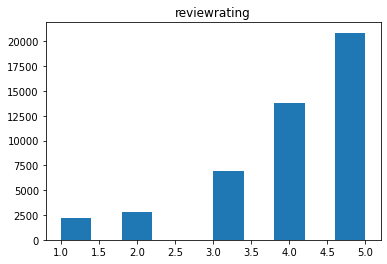

In [ ]:
# Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

#overall_ratings=df.groupby('v_name', as_index=False)['reviewrating'].mean()
#vegas_resorts_list=(df.loc[df['v_name'] .str.contains('Vegas') ,'reviewrating']).mean()
overall_ratings = (df['reviewrating'].sum())/(df.shape[0])
#print("Overall review ratings on TripAdvisor for Vegas resorts:",round(vegas_resorts_list,2))
print("Average review ratings on TripAdvisor for Vegas resorts:",round(overall_ratings,2))

hist = df.hist(column='reviewrating', bins=10,grid=False)

Number of ratings are pretty high at 4 and 5. So, we can say most of the hotel ratings have attained postive rating.


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68fb5f1d50>]],
      dtype=object)

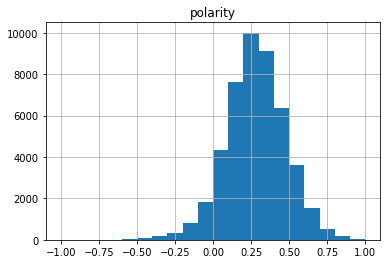

In [ ]:
from textblob import TextBlob

df['polarity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity'] = df['reviewtext'].map(lambda text: TextBlob(text).sentiment.subjectivity)

df.hist(column = 'polarity', bins = 20)
#df.hist(column = 'subjectivity', bins = 20)

We see that **polarity score for most of review texts lies in the rangeof [0,0.75]** which means **there are many positive statements.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68fb685b50>,
      dtype=object)

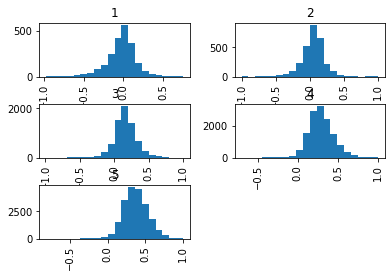

In [ ]:
# Compare the histogram of review polarity with review ratings. 
df.hist(column = 'polarity', by = 'reviewrating',bins=20)

From the graph we can see that, **review ratings are mostly aligned with the polarity score for least ratings**. Hotels with review rating 1,2 has polarity in the range [-0.5,0.5] while polarity scores for hotels with review rating 4,5 even has negative/neutral polarity.

We can **infer that people usually feel a need for writting when they are upset** or angry with the hotel service/experience. They feel complaining may give a chance to fix issue. That's why **alignment between least review ratings and polarity is higher.**

On the other hand, **For higher ratings, people don't have a need to write a long intense review that captures the mood of the writer**. They make neutral review about the experience even when they rate the resorts as 4 or 5. That's why **alignment between high review ratings and polarity is neutral in the range of [0,0.7]**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68fb779f10>]],
      dtype=object)

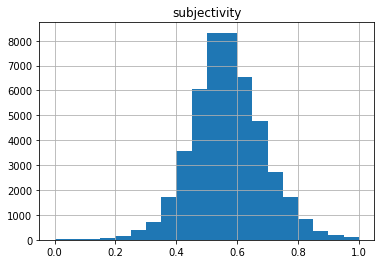

In [ ]:
# To what degree are polarity and subjectivity correlated with ratings?
df.hist(column = 'subjectivity', bins = 20)

In [ ]:
# Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. 
# In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

df.groupby('travel_category')[['reviewrating', 'polarity']].corr()

reviewrating  polarity
travel_category                                     
business        reviewrating      1.000000  0.623229
                polarity          0.623229  1.000000
couple          reviewrating      1.000000  0.568238
                polarity          0.568238  1.000000
family          reviewrating      1.000000  0.599097
                polarity          0.599097  1.000000
friends         reviewrating      1.000000  0.595152
                polarity          0.595152  1.000000
solo            reviewrating      1.000000  0.536387
                polarity          0.536387  1.000000

# Helper Functions

In [ ]:
import spacy, time
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
from gensim import corpora # import the corpora module
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split


def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time


def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file

# 2. Topics in hotel reviews 

## Preprocessing the texts (3)

In this part, you will need to borrow the functions (attached):
1. Create a folder on your google drive to save your NLP files
1. Write a file containing raw reviews.
1. Lemmatize this file into a new file of sentences.
    1. remove stopwords
    1. remove punctuation
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Apply phrase model twice to identify phrases of up to 4 words in length.
1. Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
    1. Be sure to save this dataframe so you don't have to start from scratch (can read it in if you come back to the assignment). 
    1. If you come back to this part, make sure that you that you don't delete the outputs from previous session.
1. List the directory of your NLP folder to show that your intermediate steps have been saved.

## LDA model (3)

Apply the LDA model to the parsed reviews 

1. Create a dictionary
1. Filter extreme words in the dictionary
1. Create a corpus of reviews where 1 document = 1 review.
1. Run the LDA for 10-70 topics (inclusive of 70), skipping 10 at a time. (go grab a coffee, this takes ~ 15 minutes)

**How many topics is best in terms of perplexity?**

### Visualize the topics. 

1. Load the best model.
1. Create an LDAVis. (remember you have to `! pip install pyldavis` first)
1. **Pick 3 topics that kind of make sense and describe what they represent.**

### Use LDA to compare pos vs neg reviewers
Imagine you are the marketing director for one of these hotels (pick one of the resorts), **what are the differences in topics mentioned by satisfied and dissatisfied customers?** 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vegas2015reviews.txt to vegas2015reviews (1).txt


In [ ]:
import pandas as pd
import io

df1 = pd.read_csv(io.BytesIO(uploaded['vegas2015reviews.txt']))
df1.head()

,reviewtext
0,An excellent property! The rooms are very nice...
1,My first visit to Las Vegas and WOW!! Whilst a...
2,Some of the most beautiful hotel rooms in the ...
3,"This Hotel is exceptional, its beautifully set..."
4,"My husband and I stayed here during a trip,to ..."


In [ ]:
# Create a folder on your google drive to save your NLP files
# Write a file containing raw reviews.
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.mkdir("/content/drive/MyDrive/Hotel Reviews NLP1")

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import os
os.chdir("/content/drive/MyDrive/Hotel Reviews NLP1")

#Create a Raw reviews file to store a text file.
uploaded = drive.CreateFile({'title': 'Raw_Hotel_Reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create Lemmatised reviews file to store a text file a text file.
uploaded = drive.CreateFile({'title': 'lemmatised_parsed_reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create reviews phrase detection file to store a text file.
uploaded = drive.CreateFile({'title': 'reviews_with_phrase_detection.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Create reviews phrase detection file to store a text file.
uploaded = drive.CreateFile({'title': 'phrase_modeled_reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1SAxUJkoIp_f1PPx5IHHAY8PzRCM5Q3H7
Uploaded file with ID 1X0RTUl-obkNnP6IUi1r_46n5X3825Joo
Uploaded file with ID 1w3tVXxcnjZYZfdFXhcJ6e44tCuY4WImd
Uploaded file with ID 1KEE3kOKqwWpaw7mMck_5-m7cexB74Oo1


In [ ]:
# Create reviews phrase detection file to store a text file.
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'phrase_modeled_reviews.txt'})
uploaded.SetContentString('')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1PHFXq8q-tEXqMuxSooT2-7ZfxpqfcE41


In [ ]:
import numpy as np
import pandas as pd


lemm_file_path='/content/drive/MyDrive/Hotel Reviews NLP1/lemmatised_parsed_reviews.txt'
raw_file_path="/content/drive/MyDrive/Hotel Reviews NLP1/Raw_Hotel_Reviews.txt"        #raw file path
phrase_detected_file_path='/content/drive/MyDrive/Hotel Reviews NLP1/reviews_with_phrase_detection.txt'
outpath='/content/drive/MyDrive/Hotel Reviews NLP1/phrase_modeled_reviews.txt'

to_write_txt = df['reviewtext']
np.savetxt(raw_file_path, to_write_txt, fmt='%s')

In [ ]:
!pip install nltk

In [ ]:
#Lemmatize this file into a new file of sentences.
import nltk
import spacy
import nltk.corpus

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
write_parsed_sentence_corpus(raw_file_path, lemm_file_path, nlp=nlp, batch_size=1, n_threads=2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Success


In [ ]:
#Apply phrase model twice to identify phrases of up to 4 words in length.
phrase_detection(lemm_file_path, phrase_detected_file_path)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
nlp=spacy.load('en_core_web_sm')
reloaded_model1=Phrases.load("/content/drive/MyDrive/Hotel Reviews NLP1/reviews_with_phrase_detection.txtphrase_model_1.phrasemodel")
reloaded_model2=Phrases.load("/content/drive/MyDrive/Hotel Reviews NLP1/reviews_with_phrase_detection.txtphrase_model_2.phrasemodel")
grams=[reloaded_model1,reloaded_model2]

phrase_prediction(raw_file_path, outpath,nlp, grams=grams,sw =stop_words)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
parsed_review=[]
with open(outpath, 'r') as f:
        for sentence in f:
          parsed_review.append(sentence.strip())

df['Parsed']=pd.DataFrame(parsed_review)

In [ ]:
df.head(5)

,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat,Parsed
0,g45963-d1123368,NaN,"Walnut Creek, California",0,NaN,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,excellent property room nicely generous size s...
1,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaN,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,-pron- first visit las_vegas wow whilst hotel ...
2,g45963-d1123368,NaN,Brussels,0,NaN,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,beautiful hotel room world reserve wynn websit...
3,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaN,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,hotel exceptional -pron- beautifully set every...
4,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaN,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,-pron- husband -pron- stay trip vegas friend -...


In [ ]:
#List file in Hotel Reviews Directory
import os
os.chdir("/content/drive/MyDrive/Hotel Reviews NLP1")
!ls

lemmatised_parsed_reviews.txt
phrase_modeled_reviews.txt
Raw_Hotel_Reviews.txt
reviews_with_phrase_detection.txtphrase_model_1.phrasemodel
reviews_with_phrase_detection.txtphrase_model_2.phrasemodel
reviews_with_phrase_detection.txtsent_gram_1.txt
reviews_with_phrase_detection.txtsent_gram_2.txt


LDA Model

In [ ]:
# Create Dictionary of parsed words
#Filter extreme words in the dictionary

parsed_data=df['Parsed'].tolist()
dict_of_words= corpora.Dictionary(d.split() for d in parsed_data)
print(len(dict_of_words))
dict_of_words.filter_extremes(keep_n=None)
print(len(dict_of_words))

#Create a corpus of reviews where 1 document = 1 review.
split_parsed_review=[d.split() for d in parsed_data]
doc_review_corpus = [dict_of_words.doc2bow(d) for d in split_parsed_review]

#Run the LDA for 10-70 topics (inclusive of 70) skipping 10 at a time
#How many topics is best in terms of perplexity?
perplexity_arr=[]
for k in range(10,71,10):
  LDA_Model= LdaMulticore(doc_review_corpus, id2word=dict_of_words, num_topics=k, per_word_topics=True, chunksize=100, passes=1)
  perplexity_val=LDA_Model.log_perplexity(doc_review_corpus)
  print('\nPerplexity of LDA with ',k, " topics:",perplexity_val) 
  perplexity_arr.append(perplexity_val)

40923
12818

Perplexity of LDA with  10  topics: -7.454542606562239

Perplexity of LDA with  20  topics: -7.6266586613067515

Perplexity of LDA with  30  topics: -7.735056118890639

Perplexity of LDA with  40  topics: -7.875492970452225

Perplexity of LDA with  50  topics: -7.998030693999891

Perplexity of LDA with  60  topics: -8.11754313165355

Perplexity of LDA with  70  topics: -8.246578318434414


Based on running LDA for 10-70 topics with step size of 10, we see that **Perplexity score for 70 topics is the lowest with "-8.254". So, 70 topics can be chosen for building the Best LDA model**

In [ ]:
#load the best model
Best_lda_model = LdaMulticore(doc_review_corpus, id2word=dict_of_words, num_topics=70, per_word_topics=True, chunksize=100, passes=1)

In [ ]:
!pip install pyLDAvis==3.3.0

     |████████████████████████████████| 1.7 MB 9.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.0-py2.py3-none-any.whl size=136848 sha256=e1a8a741c529bb1b670f908a0cac24794510d21aa87eb2612e4369d245e0bbb0
  Stored in directory: /root/.cache/pip/wheels/ac/e8/a9/65c27125ae26e5bc8a74df7e2c8e39bca2686b2f9685a02240
Successfully built pyLDAvis


In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models


pyLDAvis.enable_notebook()
LDA_Visualization= pyLDAvis.gensim_models.prepare(Best_lda_model, doc_review_corpus,dict_of_words)
LDA_Visualization

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.240082 -0.210462       1        1  6.540091
14    -0.284991 -0.076777       2        1  5.726438
32    -0.281069 -0.114729       3        1  5.138558
56    -0.272714 -0.012963       4        1  4.971363
3     -0.174324 -0.252838       5        1  4.084772
...         ...       ...     ...      ...       ...
30     0.107739  0.006768      66        1  0.533828
28     0.099676  0.007479      67        1  0.527961
47     0.111155  0.004197      68        1  0.523853
2      0.084725  0.002530      69        1  0.510040
29     0.118780  0.014989      70        1  0.496125

[70 rows x 5 columns], topic_info=             Term          Freq         Total Category  logprob  loglift
905          aria  16423.000000  16423.000000  Default  30.0000  30.0000
158         great  30460.000000  30460.000000  Default  29.0000  29.0000
51           pool  17629.000000  17629.000000  Default  28.0000  28.0000
82          check  19489.000000  19489.000000  Default  27.0000  27.0000
42           good  28291.000000  28291.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
4321  significant     84.414721     85.371066  Topic70  -4.9360   5.2948
3796     concrete     83.246673     84.203018  Topic70  -4.9499   5.2947
5051         neck     82.439413     83.395758  Topic70  -4.9597   5.2946
5777    incorrect     74.920776     75.877120  Topic70  -5.0553   5.2934
503        carpet    571.956357    899.406506  Topic70  -3.0227   4.8534

[3035 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
320       2  0.726019        $
320      12  0.269330        $
320      65  0.004630        $
1610     65  0.997206    $_100
1097     12  0.997201     $_15
...     ...       ...      ...
5633     46  0.992633    yummy
9365     54  0.999240  zarkana
2073     65  0.992477        £
715      40  0.997790        ’
716      40  0.995782       ’s

[5224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 15, 33, 57, 4, 40, 9, 2, 54, 17, 23, 36, 51, 5, 58, 24, 27, 19, 11, 68, 47, 34, 45, 39, 63, 37, 42, 43, 25, 70, 46, 53, 35, 20, 49, 52, 60, 12, 61, 28, 21, 7, 32, 8, 1, 67, 66, 38, 16, 10, 64, 69, 55, 50, 6, 41, 18, 65, 59, 62, 56, 13, 44, 26, 22, 31, 29, 48, 3, 30])

### **3 Topics from Hotel Reviews Dataset**

Topic 8:

topic 8's some of the frequent terms includes check, charge, pay, bill, extra, fee, wait, long queue, per_night, price, service, internet, $. From this we can infer that **topic 8 is about billing/check-out experience of the users**.

Topic 49:

Some of the frequent terms of topic 49 are mall,taxi, cafe, cabanas, center, south, reasonable_price,position, Pool, cabanas, loungues, cozy,airy. We can understand that **topic 49 is about easily accessible fun and roaming places near hotel.**

Topic 4:

Frequent terms of topic 4 are bathroom, tv, small, lighting, window, open, size, big, spacious, desk, chair. It's explainable that **topic 4 is all about the room and components of room.**

some other topics:
1.   Topic 22 is related to Music and clubbing
2.   Topic 14 is related to hotel location and hospitality

# **Finding Positive and Negative Topics using LDA for Planet Hollywood Resort & Casino**

Considering myself as the Marketing director of 'Planet Hollywood Resort & Casino', I would like to know the positive and negative topics based on reviews of the customer to take appropriate actions in order to improve service and amenities of the resort.

#### **Procedure followed to find topics:**


1.   store resort's reviews as negative and positive based on polarity score in separate dataframes 

2.   Find optimal number of topics based on perplexity score to build the LDA model

2.   Find topics on categorised reviews using optimal LDA model.


In [ ]:
holly_resort_details=df.loc[df['v_name'] == "Planet Hollywood Resort & Casino"]
holly_resort_details=holly_resort_details[["gd","v_name","ratingDate","reviewrating","reviewtext","Parsed","polarity","subjectivity"]]
holly_resort_details

,gd,v_name,ratingDate,reviewrating,reviewtext,Parsed,polarity,subjectivity
27826,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,3,I came to Vegas for my 25th Birthday. Because ...,-pron- come vegas -pron- 25th birthday -pron- ...,0.035976,0.626429
27827,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,2,A very rude staff member told me off when I in...,rude staff member tell -pron- -pron- interrupt...,-0.092778,0.752222
27828,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-23,5,This was our first time there. The whole exper...,-pron- first time whole experience begin end e...,0.400000,0.551481
27829,g45963-d91687,Planet Hollywood Resort & Casino,2015-06-12,5,My best friend invited me to a 36-hour Vegas t...,-pron- good friend invite -pron- 36-hour vegas...,0.222396,0.529861
27830,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,5,Stayed here for 7 nights. We were located on t...,stay 7 night -pron- locate 50th_floor look bac...,0.171580,0.415974
...,...,...,...,...,...,...,...,...
29615,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,5,"Favorite casino, Earl sandwich shop in casino ...",favorite casino earl sandwich shop casino good...,0.487708,0.630000
29616,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,4,This rooms are good and the staff were very pr...,room good staff professional atmosphere cater ...,0.339091,0.493636
29617,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,2,I will start with the good- the room was huge....,-pron- start good- room huge good end -pron- f...,0.170000,0.645000
29618,g45963-d91687,Planet Hollywood Resort & Casino,2015-03-16,4,guys trip out to vegas to watch some college h...,guy trip vegas watch college hoop conf tourney...,0.155556,0.348611


In [ ]:
#Building LDA model 
holly_parsed_data=holly_resort_details['Parsed'].tolist()
holly_dict_of_words= corpora.Dictionary(d.split() for d in holly_parsed_data)
print(len(holly_dict_of_words))
holly_dict_of_words.filter_extremes(keep_n=None)
print(len(holly_dict_of_words))

#Doc2bow--> Convert document (a list of words) into the bag-of-words 
#format = list of (token_id, token_count) 2-tuples. 
#Each word is assumed to be a tokenized and normalized string.

holly_split_parsed_review=[d.split() for d in holly_parsed_data]
holly_doc_review_corpus = [holly_dict_of_words.doc2bow(d) for d in holly_split_parsed_review]

holly_LDA_Model= LdaMulticore(holly_doc_review_corpus, id2word=holly_dict_of_words, num_topics=40, per_word_topics=True, chunksize=100, passes=1)

7350
1796


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
# Visualize the Negative topics

pyLDAvis.enable_notebook()
holly_LDA_Visualization= pyLDAvis.gensim_models.prepare(holly_LDA_Model, holly_doc_review_corpus,holly_dict_of_words)
holly_LDA_Visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.129118 -0.082543       1        1  9.687381
1      0.053476 -0.098148       2        1  8.774413
25     0.099875 -0.086867       3        1  6.699749
6     -0.180575 -0.095472       4        1  4.812849
7     -0.146978 -0.129564       5        1  4.696011
9     -0.034090 -0.118501       6        1  4.078637
17     0.057010 -0.102561       7        1  3.905774
8      0.151520 -0.053523       8        1  3.849456
31    -0.135270 -0.110056       9        1  3.426596
2      0.194903 -0.026669      10        1  3.382719
5      0.104716 -0.058459      11        1  3.111290
14     0.013995 -0.089273      12        1  2.918819
18     0.181655  0.015900      13        1  2.683644
13     0.025882 -0.056579      14        1  2.463830
20     0.088865 -0.073078      15        1  2.410410
30     0.149426 -0.047084      16        1  2.293622
33     0.060621 -0.061337      17        1  2.240086
0     -0.019681 -0.091285      18        1  2.216448
10    -0.136700 -0.075114      19        1  2.168616
38    -0.118209  0.185101      20        1  2.033125
12    -0.158456  0.034431      21        1  1.949199
23    -0.001930 -0.084637      22        1  1.662647
32    -0.134523 -0.039293      23        1  1.574133
24     0.065313 -0.001306      24        1  1.450530
39     0.049066 -0.011681      25        1  1.280811
29     0.043466  0.003247      26        1  1.259327
15    -0.073854  0.065251      27        1  1.234362
28    -0.153100  0.011084      28        1  1.201070
19     0.037253  0.002933      29        1  1.164711
4      0.189483  0.102432      30        1  1.147270
3     -0.081211  0.054931      31        1  1.102638
34    -0.053049  0.066222      32        1  1.050866
35    -0.145074  0.003080      33        1  0.923756
16    -0.088704  0.020028      34        1  0.876390
37     0.065334  0.240649      35        1  0.844822
27    -0.019514  0.132573      36        1  0.816035
26    -0.065793  0.158619      37        1  0.812938
21    -0.088767  0.021430      38        1  0.798307
22     0.043641  0.297099      39        1  0.677501
36     0.030861  0.178016      40        1  0.319211, topic_info=           Term         Freq        Total Category  logprob  loglift
37        great  1248.000000  1248.000000  Default  30.0000  30.0000
226          ph   387.000000   387.000000  Default  29.0000  29.0000
133        time   777.000000   777.000000  Default  28.0000  28.0000
77        strip   815.000000   815.000000  Default  27.0000  27.0000
56         nice   601.000000   601.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
53         make     1.891613   295.017001  Topic40  -4.8414   0.6975
226          ph     1.766832   387.479856  Topic40  -4.9097   0.3566
14        clean     1.764580   553.388156  Topic40  -4.9110  -0.0011
299  front_desk     1.372024   144.861402  Topic40  -5.1626   1.0876
175        pool     1.414772   549.054364  Topic40  -5.1319  -0.2142

[2103 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
282       1  0.289415     $
282       2  0.164440     $
282       3  0.013155     $
282       5  0.092087     $
282       7  0.006578     $
...     ...       ...   ...
1781     29  0.263370  zero
1781     30  0.263370  zero
679      11  0.322070     ’
679      15  0.536784     ’
916       8  0.834678    ’s

[6752 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 2, 26, 7, 8, 10, 18, 9, 32, 3, 6, 15, 19, 14, 21, 31, 34, 1, 11, 39, 13, 24, 33, 25, 40, 30, 16, 29, 20, 5, 4, 35, 36, 17, 38, 28, 27, 22, 23, 37])

Here are some meaningful topics and the related words from the lot:

**Topic 36: casino**

>frequent words:cool,classy, high-end, ambience

**topic 15:(lamba=0.5) bad reviews about building/maintenance**

>frequent words:dust,rock,understaffed,terrific,carpet,shower-head,loud

**topic 1: Front desk assistance and room service**

> frequent words: front-desk,wait,credit card, hour, house keeping, experiences

**topic 5: amenities of resort and accessible places around resort**
>hotel, music, shopping, lobby, valet-parking

**topic 28: Restaurant service**
> frequent words: food,excellent, buffet, pizza, cashier, drink, bar


### Insights Derived from LDA Model built on Pos+Neg Topics:

Based on some of the topics listed we can say that customers are satisfied with location, quality service of restaurants, casino, spa of the resorts. 

Dissatisfied customers wants to improve room service response time. Other thing they expect/ask is more cleaner rooms and environment.


Topics built by LDA model above didn't capture the main issue that dissatisfied customers had faced. So, digging deeper on next section :)

### Deeper into  Negative and Positive review of Planet HollyWood Resort
So, to dive deeper in the negative and positive topics i am building LDA based on neg and pos reviews alone by separating them based on polarity scores.

In [ ]:
#separting negative and pos reviews based on polarity

resort_negative_rev= holly_resort_details[holly_resort_details['polarity'] <= 0.3]
resort_positive_rev = holly_resort_details[holly_resort_details['polarity'] > 0.3 ] 

In [ ]:
neg_parsed_data=resort_negative_rev['Parsed'].tolist()
neg_dict_of_words= corpora.Dictionary(d.split() for d in neg_parsed_data)
print(len(neg_dict_of_words))
neg_dict_of_words.filter_extremes(keep_n=None)
print(len(neg_dict_of_words))

#Doc2bow--> Convert document (a list of words) into the bag-of-words 
#format = list of (token_id, token_count) 2-tuples. 
#Each word is assumed to be a tokenized and normalized string.

neg_split_parsed_review=[d.split() for d in neg_parsed_data]
neg_doc_review_corpus = [neg_dict_of_words.doc2bow(d) for d in neg_split_parsed_review]

neg_LDA_Model= LdaMulticore(neg_doc_review_corpus, id2word=neg_dict_of_words, num_topics=5, per_word_topics=True, chunksize=100, passes=1)

6486
1549


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
neg_LDA_Model.print_topics(num_topics=5, num_words=10)

#0.027 is the weightage of 'get'

[(0,
  '0.015*"get" + 0.012*"casino" + 0.011*"would" + 0.010*"one" + 0.009*"night" + 0.009*"good" + 0.008*"check" + 0.008*"strip" + 0.008*"go" + 0.007*"pool"'),
 (1,
  '0.028*"get" + 0.016*"go" + 0.016*"offer" + 0.014*"manager" + 0.012*"leave" + 0.012*"view" + 0.012*"rude" + 0.012*"nothing" + 0.011*"day" + 0.011*"even"'),
 (2,
  '0.018*"pool" + 0.017*"get" + 0.014*"go" + 0.012*"good" + 0.011*"clean" + 0.011*"casino" + 0.011*"strip" + 0.011*"check" + 0.010*"day" + 0.010*"one"'),
 (3,
  '0.020*"construction" + 0.014*"pool" + 0.010*"bed" + 0.010*"get" + 0.009*"like" + 0.008*"look" + 0.008*"also" + 0.008*"vegas" + 0.008*"clean" + 0.008*"would"'),
 (4,
  '0.024*"great" + 0.020*"view" + 0.015*"get" + 0.015*"upgrade" + 0.014*"casino" + 0.014*"vegas" + 0.011*"would" + 0.011*"good" + 0.011*"staff" + 0.011*"strip"')]

In [ ]:
neg_LDA_Model.print_topic(topicno=4, topn=10)

'0.024*"great" + 0.020*"view" + 0.015*"get" + 0.015*"upgrade" + 0.014*"casino" + 0.014*"vegas" + 0.011*"would" + 0.011*"good" + 0.011*"staff" + 0.011*"strip"'

In [ ]:
#positive reviews LDA model with 5 topics
pos_parsed_data=resort_positive_rev['Parsed'].tolist()
pos_dict_of_words= corpora.Dictionary(d.split() for d in pos_parsed_data)
print(len(pos_dict_of_words))
pos_dict_of_words.filter_extremes(keep_n=None)
print(len(pos_dict_of_words))

pos_split_parsed_review=[d.split() for d in pos_parsed_data]
pos_doc_review_corpus = [pos_dict_of_words.doc2bow(d) for d in pos_split_parsed_review]

pos_LDA_Model= LdaMulticore(pos_doc_review_corpus, id2word=pos_dict_of_words, num_topics=5, per_word_topics=True, chunksize=100, passes=1)

3120
661


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
#!pip install pyLDAvis=3.3.0
import pyLDAvis
import pyLDAvis.gensim_models
# Visualize the Negative topics

pyLDAvis.enable_notebook()
neg_LDA_Visualization= pyLDAvis.gensim_models.prepare(neg_LDA_Model, neg_doc_review_corpus,neg_dict_of_words)
neg_LDA_Visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.027197 -0.056993       1        1  28.696927
2     -0.032273 -0.022625       2        1  25.654464
1      0.101124  0.028989       3        1  21.941133
3     -0.052461 -0.010723       4        1  15.550578
0     -0.043587  0.061352       5        1   8.156896, topic_info=             Term        Freq       Total Category  logprob  loglift
230  construction  210.000000  210.000000  Default  30.0000  30.0000
539       manager  182.000000  182.000000  Default  29.0000  29.0000
148          pool  434.000000  434.000000  Default  28.0000  28.0000
108          rude  178.000000  178.000000  Default  27.0000  27.0000
330         offer  364.000000  364.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
81        upgrade   21.234522  414.543503   Topic5  -5.2833  -0.4652
373           guy   18.737477  205.386651   Topic5  -5.4084   0.1119
279          find   17.644643  142.856255   Topic5  -5.4685   0.4149
157          time   17.537330  404.429043   Topic5  -5.4746  -0.6318
37          great   17.525483  535.729202   Topic5  -5.4753  -0.9137

[390 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1183      1  0.136378   $_25
1183      2  0.068189   $_25
1183      3  0.068189   $_25
1183      4  0.681888   $_25
292       2  0.083453   $_32
...     ...       ...    ...
787       1  0.279462  young
787       2  0.250045  young
787       3  0.014709  young
787       4  0.161794  young
787       5  0.308880  young

[1046 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1])

### **Reviewing Negative Topics**

### Topic/Bubble 5:

**Frequent words:**(with lambda=0.87) 

upgrade, offer, construction, outdated, staff, completely, clean, price, check, look, cigarrette-smoke, manager,rude

It's evident that **this topic is regarding the outlook, maintenance of the hotel and professionalism of staffs.**

**POV of Marketing director:**
Customers look for hotels with friendly, attentive staffs and check-out services. Also, renovated, clean and well maintained bright outlooks appeals customers.


### Topic/Bubble 4:

**Frequent words:**(with lambda=0.4) 

front-desk, 1 hr, nightmare, unacceptable, wait, time, pay, staff, dirty, pool, clean, service, charge,resort_fee

From the frequent words it's evident that this topic is on front desk assistance,room services and checkout experiences. 

**POV of Marketing director:**
Rapid room sevices, good hospitality front desk assistance improves customer satisfaction

In [ ]:
# Visualize the Positive topics
pyLDAvis.enable_notebook()
pos_LDA_Visualization= pyLDAvis.gensim_models.prepare(pos_LDA_Model, pos_doc_review_corpus,pos_dict_of_words)
pos_LDA_Visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005467  0.064475       1        1  29.508723
1      0.022108  0.006665       2        1  28.858422
4      0.013658  0.011344       3        1  19.034098
0      0.061868 -0.055519       4        1  15.579260
3     -0.103100 -0.026965       5        1   7.019497, topic_info=           Term        Freq       Total Category  logprob  loglift
119         get  193.000000  193.000000  Default  30.0000  30.0000
127      always  102.000000  102.000000  Default  29.0000  29.0000
74        hotel  477.000000  477.000000  Default  28.0000  28.0000
93        place  250.000000  250.000000  Default  27.0000  27.0000
107        view  160.000000  160.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
103        stay   12.607151  509.371355   Topic5  -4.6844  -1.0424
71           go   10.615538  198.149295   Topic5  -4.8564  -0.2702
18   restaurant   10.059061  136.558885   Topic5  -4.9102   0.0482
30     friendly    9.890351  179.080518   Topic5  -4.9272  -0.2398
36        strip    9.928355  336.364187   Topic5  -4.9233  -0.8663

[373 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
52        1  0.030104        $
52        2  0.632176        $
52        3  0.270933        $
52        4  0.030104        $
614       1  0.825666     $_20
...     ...       ...      ...
23        5  0.020318    would
306       1  0.797180     year
306       3  0.099648     year
306       5  0.099648     year
578       1  0.788226  yolo_'s

[846 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

### **Reviewing Positive Topics**

Comig to positive reviews, most of the topics have same frequent words meaning that there are no intense review that users have provided explaining a disappointing/upset situation.

**Topic 1:**

nice, view, location, stay, casino, time, comfortable, clean, recommend,restaurant, eat, music, resort, spa, atmosphere, value, fee

it's obvious that all these are totally happy and satisfied words from the users.

**Marketing director's point of view:**
It's evident that customers are happy with the food,casino, atmosphere,cleanliness, friendly staffs and accessible location of the hotel.

### **Differences in topics mentioned by satisfied and dissatisfied customers**

There are topics where satisfied customers are happy with the resort's cleanliness, accessible location, amenities of the resort like casino, spa, pool, restaurant's food quality and comfortable stay at the resort.

As Per analysis of negative topics, it's observable that customers are not appealed with old outlook and cleanliness of the resort. Also, delay in room service and front desk assistance of staffs disappoints customer's expectations.


####**Suggestions to Management as a Marketing Director:**

As a Marketing Director, my sugestion is to maintain the performace in the areas hotels are performing well already like maintanence of hotels, quality restaurant food , spa, helpful and friendly staffs. 

Adding to that, staffs must be trained to be professional,friendly and can be provided credits/extra bonus for attending customers promptly thereby motivating the staff to attend the customer's issues quickly. Quick response from staffs builds up confidence and satisfaction for customers.


# **Difficulties encountered**

While working on this, I faced very less difficulty . Thanks to Helper functions and clearly laid out steps!

**File creation in Google drive folder from Colab**

This is my first time working on google colab so creating a file in drive's root path worked for me but file creation inside a folder was not working for me. I'm not sure if it's doable! Now, i created everything in my root directory and moved it to desired folder manually.

Would Appretiate your guidance on how to create file in folder using colab Pydrive code! :)

**Finding Fair topic:**

After implementation of LDA, there were many synonymns that were bundled together as a topic that made no sense for a "topic". So, looking for a meaningful topic was time consuming. Enjoyed it though.


**Finding "Right" approach for analysing pos and neg topics:**

Final part of pos and neg topic analysis on *any resort* made me examine attentively on the right approach to do this practise.  

Intially thought, it would be reasonable to generate topics based on all reviews that i had for selected hotel. But, it didn't capture the main problem that dissatisfied customers faced. 

So, i changed the approach by filtering selected hotel's reviews based on polarity score as positive and negative. Then Building LDA model on these small review datasets capured the root cause of dissatisfaction of customers.

### **Total time taken to do this analysis: 7 hrs**

Time taken to understand data and for EDA - 45 mins,

Time taken for LDA Topic modeling for finding 3 fair topics - 2.5 hrs,

Time taken for LDA Topic modeling using POS AND NEG REVIEWS of Plant Hollywood resort - 3.5 hrs

Overall Time Taken to complete the task: 7.5 hrs